In [63]:
import dload
import os
import pandas as pd
import geopandas as gpd
from datetime import datetime
from shapely.geometry import Point
import matplotlib.pyplot as plt

__file__ =os.path.abspath('')

In [5]:
def list_files_by_type(directory, file_type):
    files = []
    for filename in os.listdir(directory):
        if filename.endswith(file_type):
            files.append(filename)
    return files

In [29]:
url="https://aqs.epa.gov/aqsweb/airdata/annual_conc_by_monitor_2024.zip"
# description of annual summary files in Section 4 https://aqs.epa.gov/aqsweb/airdata/FileFormats.html
data_save = "C:\\Users\\kferguson32\\AirNowPractice\\data\\"
dload.save_unzip(url, data_save)   

'C:\\Users\\kferguson32\\AirNowPractice\\data\\'

In [36]:
file_type = ".csv"
csv_files = list_files_by_type(data_save, file_type)
df = pd.read_csv(os.path.join(data_save,csv_files[0]))

In [26]:
print(len(df.index))
print(df.shape[1])
print(df.columns)
df.head(10)

48603
55
Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Metric Used', 'Method Name', 'Year',
       'Units of Measure', 'Event Type', 'Observation Count',
       'Observation Percent', 'Completeness Indicator', 'Valid Day Count',
       'Required Day Count', 'Exceptional Data Count', 'Null Data Count',
       'Primary Exceedance Count', 'Secondary Exceedance Count',
       'Certification Indicator', 'Num Obs Below MDL', 'Arithmetic Mean',
       'Arithmetic Standard Dev', '1st Max Value', '1st Max DateTime',
       '2nd Max Value', '2nd Max DateTime', '3rd Max Value',
       '3rd Max DateTime', '4th Max Value', '4th Max DateTime',
       '1st Max Non Overlapping Value', '1st NO Max DateTime',
       '2nd Max Non Overlapping Value', '2nd NO Max DateTime',
       '99th Percentile', '98th Percentile', '95th Percentile',
       '90th Percentile', '75th Perce

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,1 HOUR,...,0.057,0.050,0.034,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2024-07-19
1,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,0.045,0.042,0.028,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2024-07-19
2,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,0.045,0.042,0.028,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2024-07-19
3,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,0.045,0.041,0.028,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2024-07-19
4,1,3,10,88101,3,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,1 HOUR,...,8.200,5.000,0.300,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2024-08-05
5,1,3,10,88101,3,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24-HR BLK AVG,...,7.300,5.200,2.200,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2024-08-05
6,1,3,10,88101,3,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24-HR BLK AVG,...,7.300,5.200,2.200,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2024-08-05
7,1,3,10,88101,3,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24-HR BLK AVG,...,7.300,5.200,2.200,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2024-08-05
8,1,3,10,88101,3,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24-HR BLK AVG,...,7.300,5.200,2.200,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2024-08-05
9,1,3,10,88101,3,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24-HR BLK AVG,...,7.300,5.200,2.200,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2024-08-05


In [ ]:
geometry = [Point(xy) for xy in zip(df.Longitude, df.Latitude)]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Plot the GeoDataFrame
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(10, 6))
gdf.plot(ax=ax, color='red')

In [ ]:
plt.scatter(df['Latitude'], df['Longitude'])
plt.show()

In [ ]:
plt.scatter(df['Longitude'], df['Latitude'])
plt.show()

In [100]:
ozone_df = df[['Parameter Name','Longitude','Latitude','1st Max Value', '1st Max DateTime']].copy()
ozone_df = ozone_df[ozone_df['Parameter Name'] == 'Ozone']
ozone_df['date'] = pd.to_datetime(ozone_df['1st Max DateTime'])

In [103]:
Y = 2000

def seasons(x):
    x = x.replace(year=Y)
    if (x >= datetime(Y, 3, 21)) and (x <= datetime(Y, 6, 20)):
        return 'Spring'
    elif (x >= datetime(Y, 6, 21)) and (x <= datetime(Y, 9, 22)):
        return 'Summer'
    elif (x >= datetime(Y, 9, 23)) and (x <= datetime(Y, 12, 20)):
        return 'Fall'
    else:
        return 'Winter'        

<Axes: xlabel='season'>

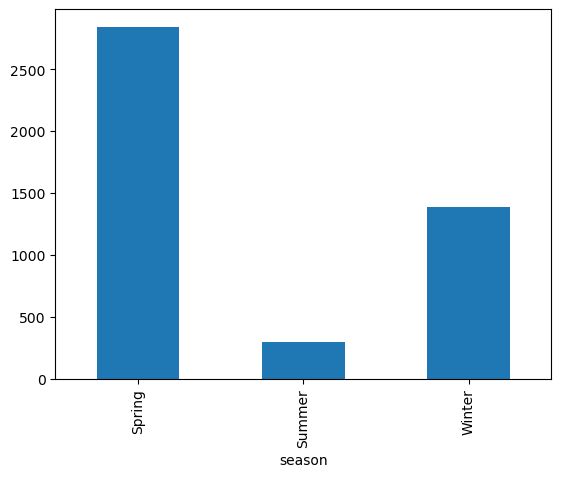

In [114]:
ozone_df['season'] = ozone_df['date'].apply(seasons)
grouped = ozone_df.groupby('season').size()
grouped.plot(kind='bar')